In [4]:
%install_ext https://raw.githubusercontent.com/meduz/ipython_magics/master/tikzmagic.py

Installed tikzmagic.py. To use it, type:
  %load_ext tikzmagic


In [5]:
%load_ext tikzmagic

The tikzmagic extension is already loaded. To reload it, use:
  %reload_ext tikzmagic


# 확률 변수

## 확률 변수의 정의

확률 변수(random variable)를 정의하기 위해서는 우선 확률 공간(probability space)이 정의되어 있어야 한다. 확률 공간은 표본 공간(sample space) $\Omega$에서 표본(sample)을 **0개 이상** 골라서 사건(event)라는 부분 집합을 만든 뒤, 이 사건에 0부터 1사이의 숫자를 붙인 것이다. 

확률과 확률 공간의 수학적인 정의에 대해서는 다음 노트북을 참조하라.

[[school_notebook:9341c66303174eea9d35b2e4b6981ed9]]

확률 변수는 표본 공간의 모든 표본에 대해 어떤 실수 값을 붙인 것이다. 확률과의 차이점은 다음과 같다.

* 확률은 표본으로 이루어진 집합 즉, 사건에 대해 할당된 숫자이지만 확률 변수는 표본 하나 하나에 대해 할당된 숫자이다.
* 확률은 0부터 1사이의 숫자만 할당할 수 있지만 확률 변수는 모든 실수 범위의 숫자를 할당할 수 있다.

따라서 확률 변수는 표본 공간을 정의역(domain)으로 가지고 실수를 공역(range)으로 가지는 함수라고 할 수 있다. 보통 $X$, $Y$ 등의 대문자 알파벳을 사용하여 확률 변수를 표기한다.

$$ \omega \in \Omega \;\;\; \xrightarrow{X} \;\;\; \text{real value} \in \mathbb{R} $$

## 이산 확률 변수

예를 들어 주사위의 확률 문제에서 주사위에서 나올 수 있는 모든 면의 집합인 표본집합 $\{⚀,⚁,⚂,⚃,⚄,⚅\}$ 내의 모든 표본에 대해 다음과 같이 숫자를 할당하면 1부터 6까지 값을 가지는 확률변수가 된다. 이렇게 확률 변수값이 연속적(continuous)이지 않고 떨어져(discrete) 있는 경우를 **이산 확률 변수(discrete random variable)**라고 한다.

$$X(⚀) = 1$$
$$X(⚁) = 2$$
$$X(⚂) = 3$$
$$X(⚃) = 4$$
$$X(⚄) = 5$$
$$X(⚅) = 6$$

주의 할 점은 이산 확률 변수의 정의는 값의 이산성이지 가능한 경우가 유한하다는 점이 아니라는 점이다. 이산 확률 변수도 연속 확률 변수와 같이 가능한 값 자체는 무한대의 경우의 수가 있을 수 있다. 예를 들어 [기하 분포(geometric distribution)](https://en.wikipedia.org/wiki/Geometric_distribution)는 양의 정수값을 가지는 이산 분포이지만 무한대의 양의 정수도 0이 아닌 확률을 가질 수 있다.

확률 변수를 정의한다는 것은 표본(sample)이라는 추상적이고 일반적인 개념대신 숫자라는 명확한 개념을 대신 사용하겠다는 의미이다. 현실적으로도 계산이 가능한 것은 숫자 뿐이므로 데이터 분석을 수행하기 위해서는 결국 표본의 특성(feature)을 숫자로 변환하는 단계가 필요하다.

## 연속 확률 변수

이번에는 주사위가 아닌 시계 바늘을 예로 들어보자. 시계 바늘이 특정한 위치를 가르키는 현상을 표본(sample)으로 생각하고 12시를 기준으로 해당 위치까지의 각도를 확률 변수로 하면 이 연속 확률 변수의 값은 실수(real number) 집합처럼 연속적이고 무한개의 경우의 수를 가진다. 
이러한 확률 변수를 **연속 확률 변수 (continuous random variable)**라고 한다.

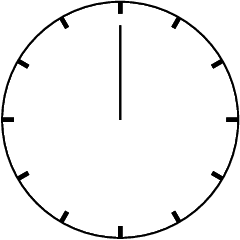

In [7]:
%%tikz
\filldraw [fill=white] (0,0) circle [radius=1cm];
\foreach \angle in {60,30,...,-270} {
  \draw[line width=1pt] (\angle:0.9cm) -- (\angle:1cm);
}
\draw (0,0) -- (90:0.8cm);

확률의 정의에서 다루었듯이 이 시계바늘 문제에서 시계바늘이 특정한 시각을 가리킬 확률은 0도이다. 따라서 확률을 정의할 때 특정한 각도에 대해 정의한 것이 아니라 구간(inteval)이라는 사건(event)에 대해 확률을 정의하였다.

확률 변수를 사용하여 얻을 수 있는 또 다른 장점은 이와 같은 연속 확률 분포의 경우에 사건(event)을 수직선 상의 실수 구간(interval)으로 변환할 수 있다는 것이다. 구간은 시작점과 끝점이라는 두 개의 숫자로 묘사하는 것이 가능하므로 결국 두 개의 실수 숫자 쌍으로 사건을 정의 할 수 있다. 

예를 들어 $\{ a \leq X < b \}$ 라는 사건은 사실 표본에 할당된 확률 변수의 값이 $a$ 보다 같거나 크고 $b$ 보다 작은 모든 표본들을 모아 놓은 부분집합인 사건을 가리키는 것으로 본다.

$$ \{ a \leq X < b \} = \{ \omega ; a \leq X(\omega) < b \} $$

따라서 확률 자체도 원래의 정의처럼 사건 자체에 대해 정의할 필요 없이 다음과 같이 실수 구간에 대해 정의할 수 있다.

$$P(\{ a \leq X < b \}) = P(\{ \omega ; a \leq X(\omega) < b \})  $$

시계 바늘 확률 문제의 경우를 예로 들면 시계바늘이 가리키는 위치의 각도는 확률 변수가 된다. 또한 확률을 정의하기 위한 사건(event)은 다음과 같이 두 위치 사이의 각(degree)이 된다. 따라서 다음과 같은 사건 및 이에 해당하는 확률을 가질 수 있다.

$$ P(\{  30^{\circ} \leq \theta < 60^{\circ} \})  $$
$$ P(\{  10^{\circ} \leq \theta < 20^{\circ} \})  $$
$$ P(\{  90^{\circ} \leq \theta < 180^{\circ} \})  $$